In [215]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/monk25/monks-1.test
/kaggle/input/monk25/monks-3.train
/kaggle/input/monk25/monks-1.train
/kaggle/input/monk25/monks-3.test
/kaggle/input/monk25/monks.names
/kaggle/input/monk25/monks-2.train
/kaggle/input/monk25/monks-2.test


In [216]:
import numpy as np
import pandas as pd

# MONK 1

In [217]:
df = pd.read_csv(
    '/kaggle/input/monk25/monks-1.train',
    sep=r'\s+',      
    header=None      
)

df

,0,1,2,3,4,5,6,7
0,1,1,1,1,1,3,1,data_5
1,1,1,1,1,1,3,2,data_6
2,1,1,1,1,3,2,1,data_19
3,1,1,1,1,3,3,2,data_22
4,1,1,1,2,1,2,1,data_27
...,...,...,...,...,...,...,...,...
119,1,3,3,2,1,4,2,data_416
120,1,3,3,2,3,1,2,data_426
121,1,3,3,2,3,2,2,data_428
122,1,3,3,2,3,3,2,data_430


In [218]:
df.columns = [
    'label',
    'A1', 'A2', 'A3', 'A4', 'A5', 'A6',
    'id'
]

df.head()


,label,A1,A2,A3,A4,A5,A6,id
0,1,1,1,1,1,3,1,data_5
1,1,1,1,1,1,3,2,data_6
2,1,1,1,1,3,2,1,data_19
3,1,1,1,1,3,3,2,data_22
4,1,1,1,2,1,2,1,data_27


In [219]:
df.tail()

,label,A1,A2,A3,A4,A5,A6,id
119,1,3,3,2,1,4,2,data_416
120,1,3,3,2,3,1,2,data_426
121,1,3,3,2,3,2,2,data_428
122,1,3,3,2,3,3,2,data_430
123,1,3,3,2,3,4,2,data_432


In [220]:
# Finding the sizes of the data
for col in ['A1','A2','A3','A4','A5','A6']:
    print(col, sorted(df[col].unique()))

A1 [1, 2, 3]
A2 [1, 2, 3]
A3 [1, 2]
A4 [1, 2, 3]
A5 [1, 2, 3, 4]
A6 [1, 2]


## Preprocessing the Data using one hot Encoding

In [221]:
import numpy as np

def one_hot_encode(df):
    
    sizes = [3, 3, 2, 3, 4, 2]

    X = df[['A1','A2','A3','A4','A5','A6']].values
    encoded = []

    for i, size in enumerate(sizes):
        temp = np.zeros((X.shape[0], size))
        temp[np.arange(X.shape[0]), X[:, i] - 1] = 1
        encoded.append(temp)

    return np.hstack(encoded)


In [222]:
X_oh = one_hot_encode(df)
y = df['label'].values

print(X_oh.shape) 

(124, 17)


In [223]:
print(X_oh[0])

[1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0.]


In [224]:
for i in range(5):
    print("Original:", df.iloc[i, 1:7].values)
    print("Encoded: ", X_oh[i])
    print()

Original: [1 1 1 1 3 1]
Encoded:  [1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0.]

Original: [1 1 1 1 3 2]
Encoded:  [1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.]

Original: [1 1 1 3 2 1]
Encoded:  [1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]

Original: [1 1 1 3 3 2]
Encoded:  [1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.]

Original: [1 1 2 1 2 1]
Encoded:  [1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.]



In [225]:
X_train = one_hot_encode(df)
y_train = df['label'].values.astype(int)

In [226]:
print(X_train.shape)  
print(y_train.shape)  

(124, 17)
(124,)


## Loading the Test Data File

In [227]:
df_test = pd.read_csv(
    '/kaggle/input/monk25/monks-1.test',
    sep=r'\s+',
    header=None
)

df_test.columns = [
    'label',
    'A1', 'A2', 'A3', 'A4', 'A5', 'A6',
    'id'
]

df_test.head()


,label,A1,A2,A3,A4,A5,A6,id
0,1,1,1,1,1,1,1,data_1
1,1,1,1,1,1,1,2,data_2
2,1,1,1,1,1,2,1,data_3
3,1,1,1,1,1,2,2,data_4
4,1,1,1,1,1,3,1,data_5


### One Hot Encoding the Test Data

In [228]:
X_test = one_hot_encode(df_test)
y_test = df_test['label'].values.astype(int)
print(X_test.shape)
print(y_test.shape)

(432, 17)
(432,)


## Defining the Neural Network

In [229]:
n_inputs = 17
n_hidden = 3  # as the professor said we can use from 2-4 units  
n_output = 1

## Defining the activation function sigmoid

In [230]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [231]:
def sigmoid_derivative(y):
    return y * (1 - y)

In [232]:
np.random.seed(42)

W1 = np.random.uniform(-0.5, 0.5, (n_inputs, n_hidden))
b1 = np.zeros(n_hidden)

W2 = np.random.uniform(-0.5, 0.5, (n_hidden, n_output))
b2 = np.zeros(n_output)

print(W1.shape)
print(W2.shape)

(17, 3)
(3, 1)


In [233]:
def forward(X):
    
    z1 = X @ W1 + b1           
    a1 = sigmoid(z1)            

    z2 = a1 @ W2 + b2          
    y_hat = sigmoid(z2)         

    return y_hat, a1

In [234]:
y_hat, a1 = forward(X_train[:5])

print("Predicted output:\n", y_hat)

Predicted output:
 [[0.63530384]
 [0.63940498]
 [0.62297206]
 [0.62673552]
 [0.62673052]]


## defining the forumula of MSE as per the slides

In [235]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred.squeeze()) ** 2)

In [236]:
loss = mse(y_train[:5], y_hat)
print("MSE (first 5 samples):", loss)

MSE (first 5 samples): 0.1367677195265015


In [237]:
learning_rate = 0.1
epochs = 500

In [238]:
mse_train_list = []
acc_train_list = []
mse_test_list = []
acc_test_list = []

In [239]:
for epoch in range(epochs):
 
    y_hat, a1 = forward(X_train)

    error = y_hat.squeeze() - y_train
    d_output = error * sigmoid_derivative(y_hat.squeeze())
    d_output = d_output.reshape(-1, 1)

    dW2 = a1.T @ d_output
    db2 = np.sum(d_output, axis=0)

    d_hidden = (d_output @ W2.T) * sigmoid_derivative(a1)
    dW1 = X_train.T @ d_hidden
    db1 = np.sum(d_hidden, axis=0)

    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    train_loss = mse(y_train, y_hat)
    mse_train_list.append(train_loss)
    train_pred = (y_hat >= 0.5).astype(int).squeeze()
    train_acc = np.mean(train_pred == y_train)
    acc_train_list.append(train_acc)

    y_test_hat, _ = forward(X_test)
    test_loss = mse(y_test, y_test_hat)
    mse_test_list.append(test_loss)
    test_pred = (y_test_hat >= 0.5).astype(int).squeeze()
    test_acc = np.mean(test_pred == y_test)
    acc_test_list.append(test_acc)

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Train MSE={train_loss:.4f}, Train Acc={train_acc:.4f}, "
              f"Test MSE={test_loss:.4f}, Test Acc={test_acc:.4f}")


Epoch 0: Train MSE=0.2578, Train Acc=0.5000, Test MSE=0.2442, Test Acc=0.6806
Epoch 50: Train MSE=0.1308, Train Acc=0.8468, Test MSE=0.1732, Test Acc=0.7523
Epoch 100: Train MSE=0.0899, Train Acc=0.9113, Test MSE=0.1269, Test Acc=0.8588
Epoch 150: Train MSE=0.0425, Train Acc=0.9839, Test MSE=0.0688, Test Acc=0.9259
Epoch 200: Train MSE=0.0154, Train Acc=1.0000, Test MSE=0.0312, Test Acc=0.9815
Epoch 250: Train MSE=0.0076, Train Acc=1.0000, Test MSE=0.0155, Test Acc=0.9954
Epoch 300: Train MSE=0.0049, Train Acc=1.0000, Test MSE=0.0096, Test Acc=1.0000
Epoch 350: Train MSE=0.0035, Train Acc=1.0000, Test MSE=0.0067, Test Acc=1.0000
Epoch 400: Train MSE=0.0028, Train Acc=1.0000, Test MSE=0.0051, Test Acc=1.0000
Epoch 450: Train MSE=0.0023, Train Acc=1.0000, Test MSE=0.0040, Test Acc=1.0000


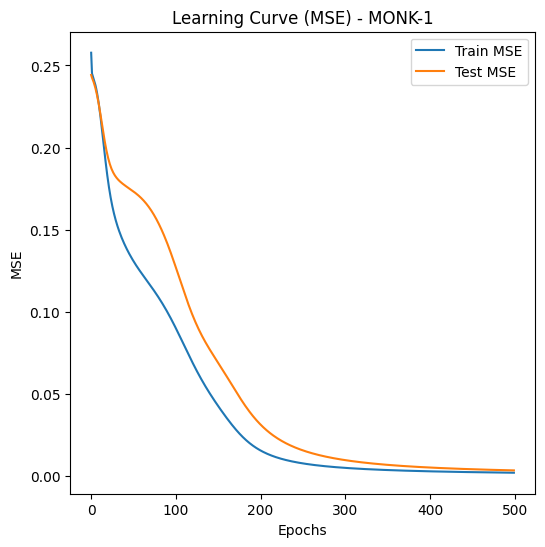

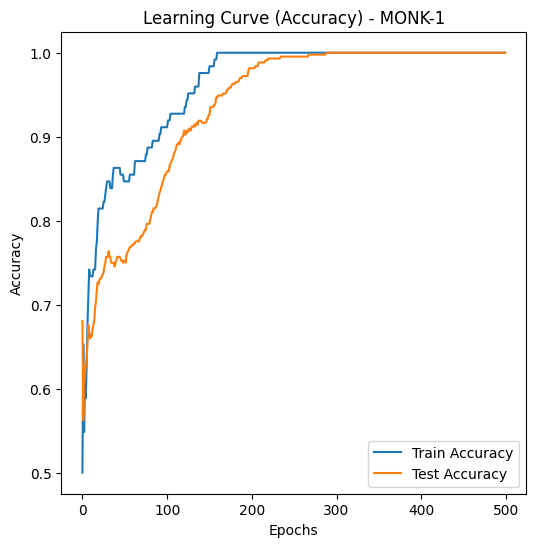

In [240]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.plot(mse_train_list, label='Train MSE')
plt.plot(mse_test_list, label='Test MSE')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Learning Curve (MSE) - MONK-1")
plt.legend()
plt.show()

# -----------------------------
# Plot Accuracy
# -----------------------------
plt.figure(figsize=(6,6))
plt.plot(acc_train_list, label='Train Accuracy')
plt.plot(acc_test_list, label='Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Accuracy) - MONK-1")
plt.legend()
plt.show()

# MONK 2

everything is same for MONK 2, but we can do some little twist and turns for experimentation

In [241]:
df2_train = pd.read_csv(
    '/kaggle/input/monk25/monks-2.train',
    sep=r'\s+',
    header=None
)

df2_train.columns = [
    'label', 'A1','A2','A3','A4','A5','A6', 'id'
]

df2_train.head()


,label,A1,A2,A3,A4,A5,A6,id
0,0,1,1,1,1,2,2,data_4
1,0,1,1,1,1,4,1,data_7
2,0,1,1,1,2,1,1,data_9
3,0,1,1,1,2,1,2,data_10
4,0,1,1,1,2,2,1,data_11


In [242]:
X2_train = one_hot_encode(df2_train)
y2_train = df2_train['label'].values.astype(int)

print(X2_train.shape)
print(y2_train.shape)

(169, 17)
(169,)


In [243]:
df2_test = pd.read_csv(
    '/kaggle/input/monk25/monks-2.test',
    sep=r'\s+',
    header=None
)

df2_test.columns = [
    'label', 'A1','A2','A3','A4','A5','A6', 'id'
]

X2_test = one_hot_encode(df2_test)
y2_test = df2_test['label'].values.astype(int)

print(X2_test.shape)
print(y2_test.shape)

(432, 17)
(432,)


In [244]:
n_inputs = 17
n_hidden = 3
n_output = 1

np.random.seed(42)
W1 = np.random.uniform(-0.5, 0.5, (n_inputs, n_hidden))
b1 = np.zeros(n_hidden)
W2 = np.random.uniform(-0.5, 0.5, (n_hidden, n_output))
b2 = np.zeros(n_output)

In [245]:
mse_train_list = []
acc_train_list = []
mse_test_list = []
acc_test_list = []

for epoch in range(epochs):
    # ---- Forward pass ----
    y_hat, a1 = forward(X2_train)

    # ---- Backprop ----
    error = y_hat.squeeze() - y2_train
    d_output = error * sigmoid_derivative(y_hat.squeeze())
    d_output = d_output.reshape(-1, 1)

    dW2 = a1.T @ d_output
    db2 = np.sum(d_output, axis=0)
    d_hidden = (d_output @ W2.T) * sigmoid_derivative(a1)
    dW1 = X2_train.T @ d_hidden
    db1 = np.sum(d_hidden, axis=0)

    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    # ---- Train metrics ----
    train_loss = mse(y2_train, y_hat)
    mse_train_list.append(train_loss)
    train_pred = (y_hat >= 0.5).astype(int).squeeze()
    train_acc = np.mean(train_pred == y2_train)
    acc_train_list.append(train_acc)

    # ---- Test metrics ----
    y2_test_hat, _ = forward(X2_test)
    test_loss = mse(y2_test, y2_test_hat)
    mse_test_list.append(test_loss)
    test_pred = (y2_test_hat >= 0.5).astype(int).squeeze()
    test_acc = np.mean(test_pred == y2_test)
    acc_test_list.append(test_acc)

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Train MSE={train_loss:.4f}, Train Acc={train_acc:.4f}, "
              f"Test MSE={test_loss:.4f}, Test Acc={test_acc:.4f}")


Epoch 0: Train MSE=0.2943, Train Acc=0.3787, Test MSE=0.2243, Test Acc=0.6713
Epoch 50: Train MSE=0.2087, Train Acc=0.6686, Test MSE=0.2107, Test Acc=0.6250
Epoch 100: Train MSE=0.1077, Train Acc=0.8994, Test MSE=0.1208, Test Acc=0.8704
Epoch 150: Train MSE=0.0154, Train Acc=1.0000, Test MSE=0.0177, Test Acc=1.0000
Epoch 200: Train MSE=0.0058, Train Acc=1.0000, Test MSE=0.0068, Test Acc=1.0000
Epoch 250: Train MSE=0.0034, Train Acc=1.0000, Test MSE=0.0039, Test Acc=1.0000
Epoch 300: Train MSE=0.0023, Train Acc=1.0000, Test MSE=0.0027, Test Acc=1.0000
Epoch 350: Train MSE=0.0018, Train Acc=1.0000, Test MSE=0.0020, Test Acc=1.0000
Epoch 400: Train MSE=0.0014, Train Acc=1.0000, Test MSE=0.0016, Test Acc=1.0000
Epoch 450: Train MSE=0.0012, Train Acc=1.0000, Test MSE=0.0014, Test Acc=1.0000


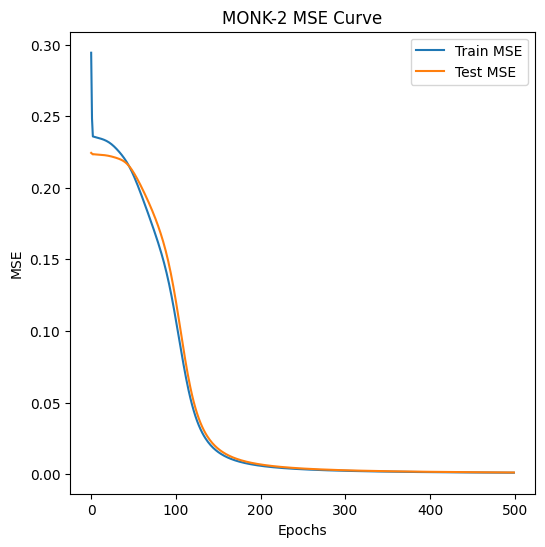

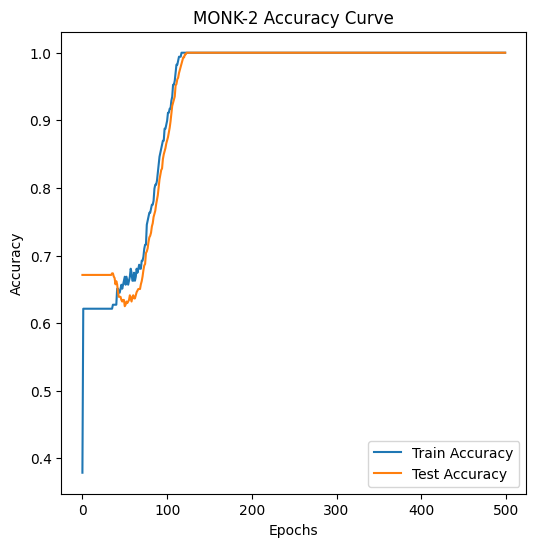

In [246]:
plt.figure(figsize=(6,6))
plt.plot(mse_train_list, label='Train MSE')
plt.plot(mse_test_list, label='Test MSE')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("MONK-2 MSE Curve")
plt.legend()
plt.show()

plt.figure(figsize=(6,6))
plt.plot(acc_train_list, label='Train Accuracy')
plt.plot(acc_test_list, label='Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("MONK-2 Accuracy Curve")
plt.legend()
plt.show()


# MONK 3

In [247]:
df3_train = pd.read_csv(
    '/kaggle/input/monk25/monks-3.train',
    sep=r'\s+',
    header=None
)

df3_train.columns = [
    'label', 'A1','A2','A3','A4','A5','A6', 'id'
]

df3_train.head()


,label,A1,A2,A3,A4,A5,A6,id
0,1,1,1,1,1,1,2,data_2
1,1,1,1,1,1,2,1,data_3
2,1,1,1,1,1,2,2,data_4
3,0,1,1,1,1,3,1,data_5
4,0,1,1,1,1,4,1,data_7


In [248]:
for col in ['A1','A2','A3','A4','A5','A6']:
    print(col, df3_train[col].unique())

df3_train['label'].value_counts()

A1 [1 2 3]
A2 [1 2 3]
A3 [1 2]
A4 [1 2 3]
A5 [1 2 3 4]
A6 [2 1]


label
0    62
1    60
Name: count, dtype: int64

In [249]:
X3_train = one_hot_encode(df3_train)
y3_train = df3_train['label'].values.astype(int)

print(X3_train.shape)
print(y3_train.shape)


(122, 17)
(122,)


In [250]:
df3_test = pd.read_csv(
    '/kaggle/input/monk25/monks-3.test',
    sep=r'\s+',
    header=None
)

df3_test.columns = [
    'label', 'A1','A2','A3','A4','A5','A6', 'id'
]

X3_test = one_hot_encode(df3_test)
y3_test = df3_test['label'].values.astype(int)

print(X3_test.shape)
print(y3_test.shape)


(432, 17)
(432,)


In [251]:
for col in ['A1','A2','A3','A4','A5','A6']:
    print(col, df3_test[col].unique())

df3_test['label'].value_counts()

A1 [1 2 3]
A2 [1 2 3]
A3 [1 2]
A4 [1 2 3]
A5 [1 2 3 4]
A6 [1 2]


label
1    228
0    204
Name: count, dtype: int64

In [253]:
n_inputs = 17
n_hidden = 4
n_output = 1

np.random.seed(42)
W1 = np.random.uniform(-0.5, 0.5, (n_inputs, n_hidden))
b1 = np.zeros(n_hidden)
W2 = np.random.uniform(-0.5, 0.5, (n_hidden, n_output))
b2 = np.zeros(n_output)

In [254]:
mse_train_list = []
acc_train_list = []
mse_test_list = []
acc_test_list = []

for epoch in range(epochs):
    # ---- Forward pass ----
    y_hat, a1 = forward(X3_train)

    # ---- Backprop ----
    error = y_hat.squeeze() - y3_train
    d_output = error * sigmoid_derivative(y_hat.squeeze())
    d_output = d_output.reshape(-1, 1)

    dW2 = a1.T @ d_output
    db2 = np.sum(d_output, axis=0)
    d_hidden = (d_output @ W2.T) * sigmoid_derivative(a1)
    dW1 = X3_train.T @ d_hidden
    db1 = np.sum(d_hidden, axis=0)

    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    # ---- Train metrics ----
    train_loss = mse(y3_train, y_hat)
    mse_train_list.append(train_loss)
    train_pred = (y_hat >= 0.5).astype(int).squeeze()
    train_acc = np.mean(train_pred == y3_train)
    acc_train_list.append(train_acc)

    # ---- Test metrics ----
    y3_test_hat, _ = forward(X3_test)
    test_loss = mse(y3_test, y3_test_hat)
    mse_test_list.append(test_loss)
    test_pred = (y3_test_hat >= 0.5).astype(int).squeeze()
    test_acc = np.mean(test_pred == y3_test)
    acc_test_list.append(test_acc)

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Train MSE={train_loss:.4f}, Train Acc={train_acc:.4f}, "
              f"Test MSE={test_loss:.4f}, Test Acc={test_acc:.4f}")


Epoch 0: Train MSE=0.2453, Train Acc=0.6393, Test MSE=0.2434, Test Acc=0.6088
Epoch 50: Train MSE=0.0547, Train Acc=0.9344, Test MSE=0.0440, Test Acc=0.9699
Epoch 100: Train MSE=0.0464, Train Acc=0.9508, Test MSE=0.0445, Test Acc=0.9560
Epoch 150: Train MSE=0.0429, Train Acc=0.9508, Test MSE=0.0466, Test Acc=0.9514
Epoch 200: Train MSE=0.0408, Train Acc=0.9590, Test MSE=0.0485, Test Acc=0.9398
Epoch 250: Train MSE=0.0393, Train Acc=0.9590, Test MSE=0.0500, Test Acc=0.9398
Epoch 300: Train MSE=0.0382, Train Acc=0.9590, Test MSE=0.0513, Test Acc=0.9398
Epoch 350: Train MSE=0.0373, Train Acc=0.9590, Test MSE=0.0522, Test Acc=0.9375
Epoch 400: Train MSE=0.0366, Train Acc=0.9590, Test MSE=0.0529, Test Acc=0.9352
Epoch 450: Train MSE=0.0357, Train Acc=0.9590, Test MSE=0.0533, Test Acc=0.9352


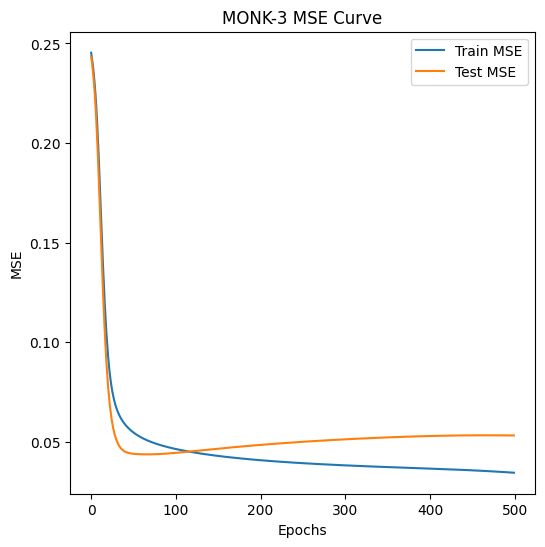

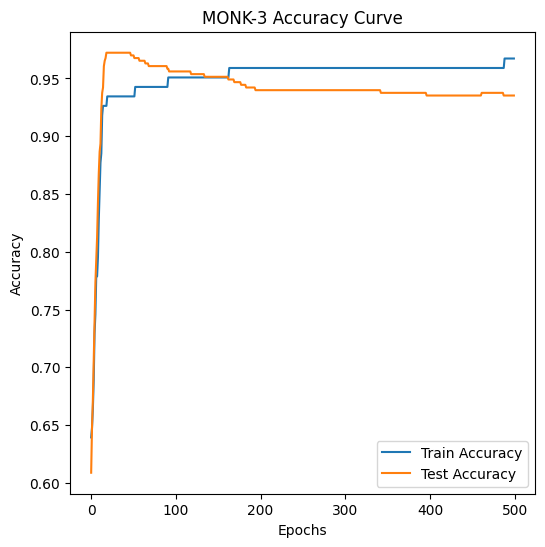

In [255]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.plot(mse_train_list, label='Train MSE')
plt.plot(mse_test_list, label='Test MSE')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("MONK-3 MSE Curve")
plt.legend()
plt.show()

plt.figure(figsize=(6,6))
plt.plot(acc_train_list, label='Train Accuracy')
plt.plot(acc_test_list, label='Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("MONK-3 Accuracy Curve")
plt.legend()
plt.show()


## Performing with L2 regularization for better generilisation by adding penalty to the weights

In [256]:
n_inputs = 17
n_hidden = 4
n_output = 1

np.random.seed(42)
W1 = np.random.uniform(-0.5, 0.5, (n_inputs, n_hidden))
b1 = np.zeros(n_hidden)
W2 = np.random.uniform(-0.5, 0.5, (n_hidden, n_output))
b2 = np.zeros(n_output)

In [257]:
lambda_reg = 0.1  

In [258]:
mse_train_list = []
mse_test_list = []
acc_train_list = []
acc_test_list = []

for epoch in range(epochs):

    # -------- TRAIN --------
    y_hat_train, a1_train = forward(X3_train)

    error = y_hat_train.squeeze() - y3_train
    d_output = error * sigmoid_derivative(y_hat_train.squeeze())
    d_output = d_output.reshape(-1, 1)

    dW2 = a1_train.T @ d_output + lambda_reg * W2
    db2 = np.sum(d_output, axis=0)

    d_hidden = (d_output @ W2.T) * sigmoid_derivative(a1_train)
    dW1 = X3_train.T @ d_hidden + lambda_reg * W1
    db1 = np.sum(d_hidden, axis=0)

    # Update weights
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    # Train metrics
    train_mse = mse(y3_train, y_hat_train)
    train_pred = (y_hat_train >= 0.5).astype(int).squeeze()
    train_acc = np.mean(train_pred == y3_train)

    mse_train_list.append(train_mse)
    acc_train_list.append(train_acc)

    # -------- TEST --------
    y_hat_test, _ = forward(X3_test)

    test_mse = mse(y3_test, y_hat_test)
    test_pred = (y_hat_test >= 0.5).astype(int).squeeze()
    test_acc = np.mean(test_pred == y3_test)

    mse_test_list.append(test_mse)
    acc_test_list.append(test_acc)

    if epoch % 50 == 0:
        print(
            f"Epoch {epoch}: "
            f"Train MSE={train_mse:.4f}, Train Acc={train_acc:.4f} | "
            f"Test MSE={test_mse:.4f}, Test Acc={test_acc:.4f}"
        )


Epoch 0: Train MSE=0.2453, Train Acc=0.6393 | Test MSE=0.2434, Test Acc=0.6111
Epoch 50: Train MSE=0.0636, Train Acc=0.9344 | Test MSE=0.0499, Test Acc=0.9722
Epoch 100: Train MSE=0.0599, Train Acc=0.9344 | Test MSE=0.0484, Test Acc=0.9722
Epoch 150: Train MSE=0.0595, Train Acc=0.9344 | Test MSE=0.0482, Test Acc=0.9722
Epoch 200: Train MSE=0.0594, Train Acc=0.9344 | Test MSE=0.0480, Test Acc=0.9722
Epoch 250: Train MSE=0.0593, Train Acc=0.9344 | Test MSE=0.0479, Test Acc=0.9722
Epoch 300: Train MSE=0.0593, Train Acc=0.9344 | Test MSE=0.0478, Test Acc=0.9722
Epoch 350: Train MSE=0.0593, Train Acc=0.9344 | Test MSE=0.0477, Test Acc=0.9722
Epoch 400: Train MSE=0.0593, Train Acc=0.9344 | Test MSE=0.0477, Test Acc=0.9722
Epoch 450: Train MSE=0.0593, Train Acc=0.9344 | Test MSE=0.0477, Test Acc=0.9722


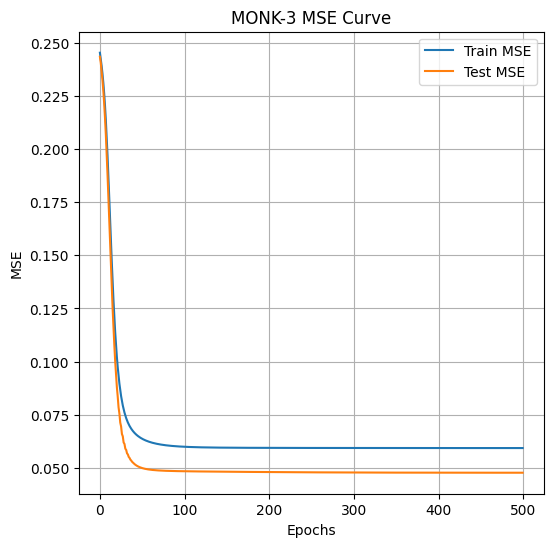

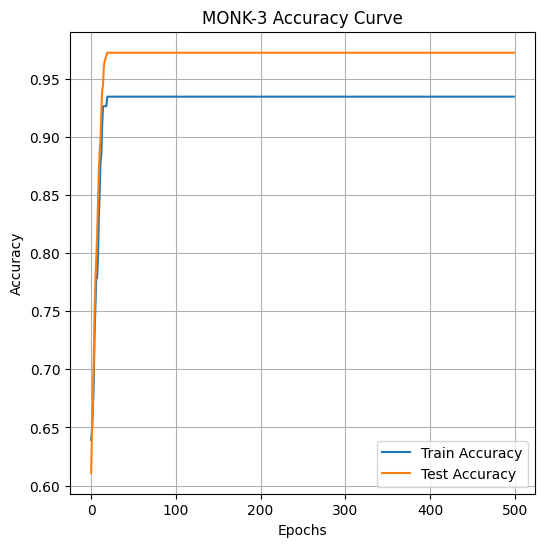

In [259]:
import matplotlib.pyplot as plt

# -------- MSE CURVE --------
plt.figure(figsize=(6, 6))
plt.plot(mse_train_list, label="Train MSE")
plt.plot(mse_test_list, label="Test MSE")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("MONK-3 MSE Curve")
plt.legend()
plt.grid(True)
plt.show()

# -------- ACCURACY CURVE --------
plt.figure(figsize=(6, 6))
plt.plot(acc_train_list, label="Train Accuracy")
plt.plot(acc_test_list, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("MONK-3 Accuracy Curve")
plt.legend()
plt.grid(True)
plt.show()


## Experimenting the Dataset with K fold cross Validation

In [260]:
from sklearn.model_selection import KFold

In [261]:
df_monk3 = pd.read_csv(
    '/kaggle/input/monk25/monks-3.train',
    sep=r'\s+',
    header=None
)

df_monk3.columns = [
    'label',
    'A1','A2','A3','A4','A5','A6',
    'id'
]

df_monk3.head()

,label,A1,A2,A3,A4,A5,A6,id
0,1,1,1,1,1,1,2,data_2
1,1,1,1,1,1,2,1,data_3
2,1,1,1,1,1,2,2,data_4
3,0,1,1,1,1,3,1,data_5
4,0,1,1,1,1,4,1,data_7


In [262]:
X_monk3 = one_hot_encode(df_monk3)   # shape: (432, 17)
y_monk3 = df_monk3['label'].values.reshape(-1, 1)

print(X_monk3.shape)
print(y_monk3.shape)

(122, 17)
(122, 1)


In [263]:
class NeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.W1 = np.random.randn(input_dim, hidden_dim) * 0.1
        self.b1 = np.zeros((1, hidden_dim))

        self.W2 = np.random.randn(hidden_dim, output_dim) * 0.1
        self.b2 = np.zeros((1, output_dim))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def forward(self, X):
        self.z1 = X @ self.W1 + self.b1
        self.a1 = self.sigmoid(self.z1)

        self.z2 = self.a1 @ self.W2 + self.b2
        self.a2 = self.sigmoid(self.z2)

        return self.a2

    def backward(self, X, y, lr):
        m = X.shape[0]

        dz2 = self.a2 - y
        dW2 = (self.a1.T @ dz2) / m
        db2 = np.mean(dz2, axis=0, keepdims=True)

        dz1 = (dz2 @ self.W2.T) * self.a1 * (1 - self.a1)
        dW1 = (X.T @ dz1) / m
        db1 = np.mean(dz1, axis=0, keepdims=True)

        self.W2 -= lr * dW2
        self.b2 -= lr * db2
        self.W1 -= lr * dW1
        self.b1 -= lr * db1

    def train(self, X, y, epochs=300, lr=0.1):
        for _ in range(epochs):
            self.forward(X)
            self.backward(X, y, lr)

In [264]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_accuracies = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_monk3), 1):

    X_train = X_monk3[train_idx]
    y_train = y_monk3[train_idx]

    X_val = X_monk3[val_idx]
    y_val = y_monk3[val_idx]

    model = NeuralNetwork(input_dim=17, hidden_dim=12, output_dim=1)
    model.train(X_train, y_train, epochs=400, lr=0.1)

    preds = model.forward(X_val)
    preds_cls = (preds >= 0.5).astype(int)

    acc = np.mean(preds_cls == y_val)
    fold_accuracies.append(acc)

    print(f"Fold {fold} Accuracy: {acc:.4f}")

Fold 1 Accuracy: 0.8800
Fold 2 Accuracy: 0.7600
Fold 3 Accuracy: 0.9167
Fold 4 Accuracy: 0.9583
Fold 5 Accuracy: 0.7917


In [265]:
print("Mean CV Accuracy:", np.mean(fold_accuracies))
print("Std CV Accuracy:", np.std(fold_accuracies))

Mean CV Accuracy: 0.8613333333333333
Std CV Accuracy: 0.07475441272742514
